In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [218]:
for i in range(10):
    num = df[df['label'] == i].shape[0]
    print('Number of {} is {}'.format(i,num))

Number of 0 is 4132
Number of 1 is 4684
Number of 2 is 4177
Number of 3 is 4351
Number of 4 is 4072
Number of 5 is 3795
Number of 6 is 4137
Number of 7 is 4401
Number of 8 is 4063
Number of 9 is 4188


In [219]:
def getmask(df, number, verbose=False):
    label = df[df['label'] == number].reset_index(drop=True)
    l = []
    for i in range(len(label)):
        l.append(label.iloc[i].drop('label').values.reshape(28,28))
    l = np.array(l)
    if verbose == True:
        print('Shape of array=', l.shape)
    r = np.zeros((28,28))
    for i in range(len(l)):
        r = r + l[i]
    r = (r / len(l))
    
    return r

In [220]:
mask = []
for i in range(0,10):
    mask.append(getmask(df, i))


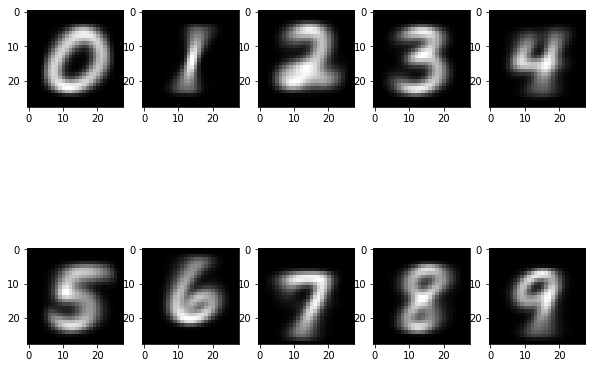

In [45]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10,8))
i = 0
for row in ax:
    for col in row:
        if i<10:
            col.imshow(mask[i], cmap='gray')
        i = i + 1
        
mask = np.array(mask)

In [164]:
def getlabel(record):
    a=[]
    record = record.values.reshape(28,28)
    for msk in mask:
        r = msk * record
        a.append(r.sum())
    
    a = np.array(a)
    return a.argmax()
        

In [ ]:
test_df = pd.read_csv('test.csv')

Predicted = 6


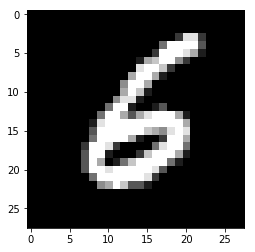

In [248]:
value = 19999

plt.imshow(test_df.iloc[value].values.reshape(28,28), cmap='gray')
print('Predicted =',getlabel(test_df.iloc[value]))